In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
df_red = pd.read_csv('/home/hjoaquim/Documents/applied-ai/wine-analysis/data/red_wine.csv')
df_white = pd.read_csv('/home/hjoaquim/Documents/applied-ai/wine-analysis/data/white_wine.csv')

In [3]:
print("Red wine data")
display(df_red.head())
print("Withe wine data")
display(df_white.head())

Red wine data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,6
1,7.8,0.82,0.29,4.3,0.083,21.0,64.0,0.99642,3.16,0.53,9.4,5
2,7.1,0.66,0.00,3.9,0.086,17.0,45.0,0.99760,3.46,0.54,9.5,5
3,6.1,0.56,0.00,2.2,0.079,6.0,9.0,0.99480,3.59,0.54,11.5,6
4,7.8,0.55,0.35,2.2,0.074,21.0,66.0,0.99740,3.25,0.56,9.2,5


Withe wine data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.15,0.17,0.24,9.6,0.119,56.0,178.0,0.99578,3.15,0.44,10.2,6
1,6.90,0.28,0.31,7.2,0.040,47.0,168.0,0.99460,3.29,0.57,10.6,7
2,5.80,0.20,0.24,1.4,0.033,65.0,169.0,0.99043,3.59,0.56,12.3,7
3,6.60,0.16,0.34,1.1,0.037,41.0,115.0,0.98990,3.01,0.68,12.0,6
4,5.00,0.33,0.23,11.8,0.030,23.0,158.0,0.99322,3.41,0.64,11.8,6


# Exploratory Data Analysis

In [4]:
print(f"Shape: red wine: {df_red.shape}")
print(f"Shape: white wine: {df_white.shape}")

Shape: red wine: (1439, 12)
Shape: white wine: (4408, 12)


In [5]:
print("Descriptive Statistics: red wine")
display(df_red.describe())
print("Descriptive Statistics: white wine")
display(df_white.describe())

Descriptive Statistics: red wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1439.000000,1439.000000,1439.000000,1437.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,8.320153,0.526647,0.269715,2.538170,0.086934,16.445448,48.674774,0.996760,3.311362,0.656991,10.415369,5.635163
std,1.745468,0.176061,0.193006,1.392716,0.044226,23.145748,84.571789,0.001877,0.153864,0.165492,1.066753,0.807416
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996770,3.310000,0.620000,10.100000,6.000000
75%,9.200000,0.637500,0.420000,2.600000,0.090000,21.000000,62.500000,0.997855,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.330000,1.000000,15.400000,0.610000,800.000000,3000.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Descriptive Statistics: white wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4408.000000,4408.000000,4408.000000,4407.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.858031,0.278319,0.334349,6.384876,0.047428,35.191016,138.133848,0.994022,3.188190,0.489719,10.532527,5.877949
std,0.846353,0.100745,0.121048,5.096459,0.121656,17.057406,42.307063,0.002991,0.152418,0.115203,1.617462,0.886110
min,3.800000,0.080000,0.000000,0.600000,0.012000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991740,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.100000,0.043000,34.000000,134.000000,0.993725,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,45.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,8.000000,289.000000,440.000000,1.038980,3.820000,1.080000,80.000000,9.000000


In [6]:
print("Types: red wine"); display(df_red.dtypes)
print("Types: white wine"); display(df_white.dtypes)

Types: red wine


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Types: white wine


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          2
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          1
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# Rows with null values
print("Red wine"); display(df_red[df_red['residual sugar'].isnull()])
print("White wine"); display(df_white[df_white['residual sugar'].isnull()])

Red wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
584,7.6,0.49,0.26,NaN,0.236,10.0,88.0,0.99680,3.11,0.8,9.3,5
645,8.6,0.47,0.27,NaN,0.055,14.0,28.0,0.99516,3.18,0.8,11.2,5


White wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
65,7.6,0.21,0.44,NaN,0.036,10.0,119.0,0.9913,3.01,0.7,12.8,6


Red wine


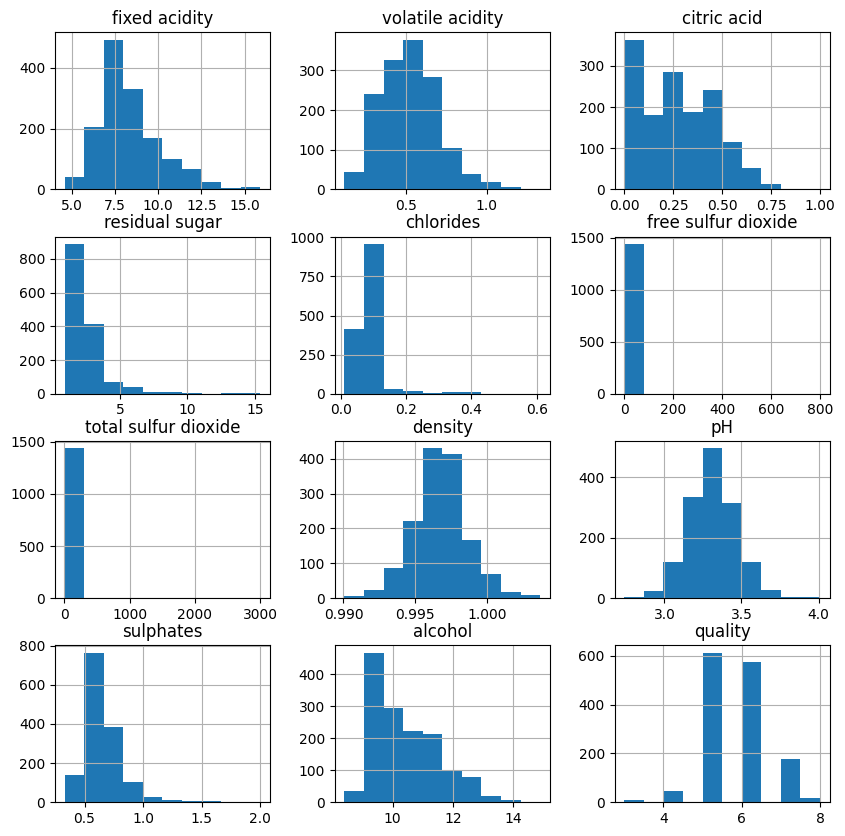

White wine


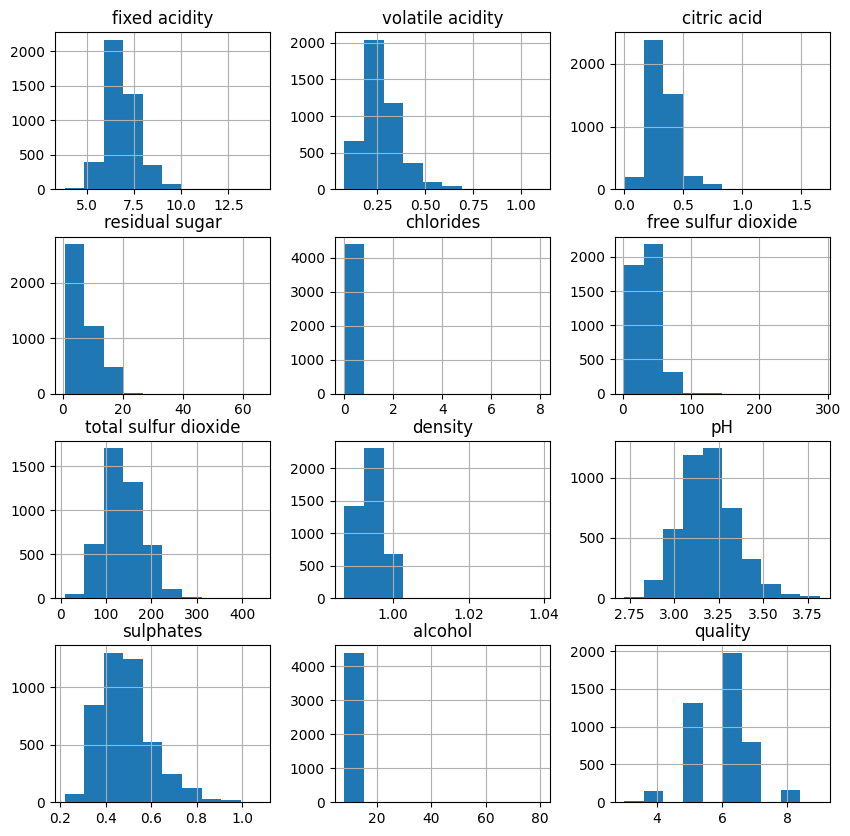

In [10]:
# Univariate analysis - understanding the distribution of each variable
print("Red wine"); df_red.hist(figsize=(10,10)); plt.show()
print("White wine"); df_white.hist(figsize=(10,10)); plt.show()

## Interpreting the Histograms

### Red wine

1. **Fixed Acidity**:
    - The data is somewhat right-skewed, indicating that most wines have a lower fixed acidity, but a few have a high fixed acidity.
2. **Volatile Acidit**y:
    - The distribution appears fairly normal but slightly right-skewed, suggesting that while many wines have a moderate level of volatile acidity, there are fewer wines with high volatile acidity.
3. **Citric Acid**:
    - This histogram shows a right-skewed distribution with a peak close to zero, indicating most wines have low citric acid content. There's a long tail towards higher citric acid contents, showing that fewer wines have higher amounts.
4. **Residual Sugar**:
    - The distribution is heavily right-skewed. Most of the wines have low residual sugar, with very few wines having high residual sugar levels.
5. **Chlorides**:
    - The data is right-skewed, which suggests most wines have low chloride content, with some exceptional wines having higher chloride levels.
6. **Free Sulfur Dioxide**:
    - This variable shows a right-skewed distribution. The majority of wines have a lower amount of free sulfur dioxide, and fewer wines have a higher amount.
7. **Total Sulfur Dioxide**:
    - The distribution is also right-skewed, indicating that most wines have a lower concentration of total sulfur dioxide, but there are some with a significantly higher concentration.
8. **Density**:
    - The density histogram appears to be somewhat normally distributed, but with a peak slightly to the left, suggesting many wines have a density around a common value with fewer wines at the lower and higher ends.
9. **pH**:
    - The distribution looks approximately normal, indicating that the pH levels of most wines are concentrated around a central value, which is typical for wine.
10. **Sulphates**:
    - The histogram for sulphates is right-skewed, indicating most wines have a low to moderate sulphate level, and fewer wines have high levels of sulphates.
11. **Alcohol**:
    - The alcohol content appears to have a bimodal distribution, suggesting two different groups within the dataset, possibly indicating wines with typically lower alcohol content and those with higher alcohol content.
12. **Quality**:
    - The quality variable shows a distribution that is not quite normal and is skewed to the right. It suggests that there are more wines of medium quality and fewer of high quality.

### White wine

1. **Fixed Acidity**:
    - This histogram shows a right-skewed distribution with a peak around 6-8, indicating that most wines have moderate fixed acidity levels, with fewer wines having higher acidity.
2. **Volatile Acidity**:
    - The distribution is slightly right-skewed, with most wines having low to moderate volatile acidity.
3. **Citric Acid**:
    - The data is right-skewed with most wines containing lower levels of citric acid and fewer wines having higher levels.
4. **Residual Sugar**:
    - A heavily right-skewed distribution indicates that most wines have low levels of residual sugar, with a few wines showing much higher levels.
5. **Chlorides**:
    - This histogram shows a right-skewed distribution, with most wines having low chloride content.
6. **Free Sulfur Dioxide**:
    - The distribution is right-skewed, with a concentration of wines having lower levels of free sulfur dioxide.
7. **Total Sulfur Dioxide**:
    - The data shows a right-skewed distribution, indicating that most wines have low to moderate levels of total sulfur dioxide.
8. **Density**:
    - The histogram suggests a normal distribution centered around 0.996 to 0.998, indicating that most wines have a similar density.
9. **pH**:
    - The distribution appears to be normally distributed with a slight left skew, indicating that the pH of most wines is concentrated around a central value.
10. **Sulphates**:
    - The data is right-skewed, with the majority of wines having lower sulphate levels.
11. **Alcohol**:
    - This histogram is quite right-skewed, with a majority of wines having an alcohol content around 9-10%.
12. **Quality**:
    - The quality distribution shows that most wines are of average quality, with few wines at the high and low ends of the quality scale.

### Summary

**Right Skewness**: Many variables such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, and sulphates show a right-skewed distribution in both sets of wine data. This indicates a commonality in the distribution where a large number of wines tend to have lower values for these chemical properties, with fewer wines having high values.

**Density**: In both datasets, the density appears to be normally distributed, suggesting a similarity in wine production processes that result in a consistent density.

**pH**: Both histograms for pH are approximately normal, indicating that the acidity level in both sets of wines tends to cluster around a central typical value.

**Alcohol Content**: Both sets have histograms that show skewness, but the second dataset's (**white wine**) histogram is more right-skewed, indicating a tendency for lower alcohol content with fewer wines having higher alcohol content, whereas the first (**red wine**)dataset showed a bimodal distribution.

**Quality**: The quality variable for both datasets is not normally distributed and shows a concentration of data around the median quality levels, suggesting most wines are of average quality in both datasets.

These similarities suggest that despite differences that may exist in the details of each wine's properties, there are common trends in terms of their chemical composition and quality distribution. These trends could reflect industry standards, common winemaking practices, or consumer preferences that influence how wines are produced and marketed.

Red wine


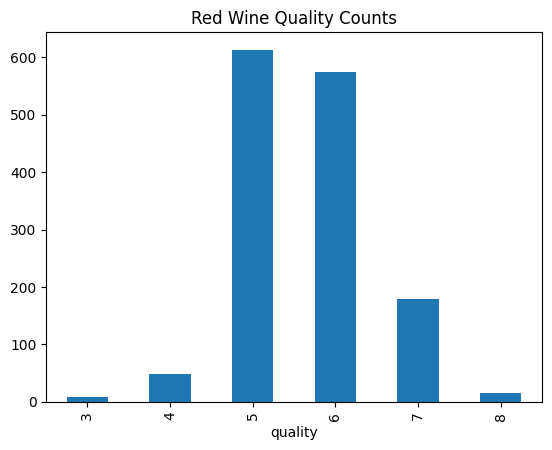

White wine


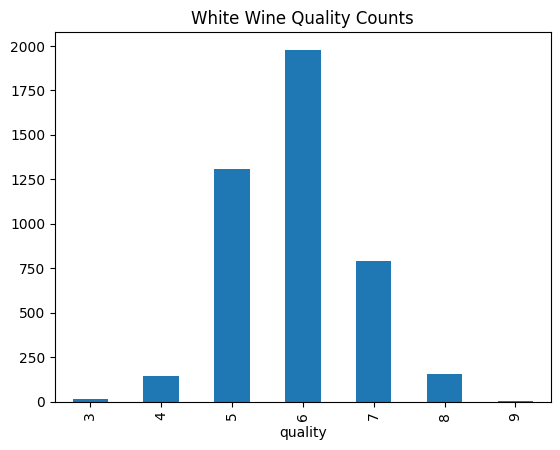

In [11]:
# Bar chart of quality counts
red_q = df_red['quality'].value_counts().sort_index()
white_q = df_white['quality'].value_counts().sort_index()
print("Red wine"); red_q.plot(kind='bar', title='Red Wine Quality Counts'); plt.show()
print("White wine"); white_q.plot(kind='bar', title='White Wine Quality Counts'); plt.show()

Red wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.270678,0.674747,0.106255,0.103840,-0.083126,-0.028117,0.673929,-0.687192,0.182837,-0.073677,0.123892
volatile acidity,-0.270678,1.000000,-0.558237,0.005030,0.064370,-0.015880,-0.007111,0.002437,0.236616,-0.265066,-0.187569,-0.383187
citric acid,0.674747,-0.558237,1.000000,0.145865,0.189313,-0.032928,0.049208,0.381923,-0.536016,0.305600,0.094909,0.226471
residual sugar,0.106255,0.005030,0.145865,1.000000,0.074542,0.081450,0.084354,0.339353,-0.088549,0.002554,0.052601,0.015702
chlorides,0.103840,0.064370,0.189313,0.074542,1.000000,0.001703,0.011959,0.216914,-0.262724,0.362767,-0.224012,-0.119760
free sulfur dioxide,-0.083126,-0.015880,-0.032928,0.081450,0.001703,1.000000,0.108737,-0.018051,0.041481,0.020321,-0.035384,-0.019653
total sulfur dioxide,-0.028117,-0.007111,0.049208,0.084354,0.011959,0.108737,1.000000,0.023336,-0.041282,0.083528,-0.044144,-0.034450
density,0.673929,0.002437,0.381923,0.339353,0.216914,-0.018051,0.023336,1.000000,-0.356516,0.143291,-0.497867,-0.164902
pH,-0.687192,0.236616,-0.536016,-0.088549,-0.262724,0.041481,-0.041282,-0.356516,1.000000,-0.190280,0.218541,-0.053653
sulphates,0.182837,-0.265066,0.305600,0.002554,0.362767,0.020321,0.083528,0.143291,-0.190280,1.000000,0.097311,0.250487


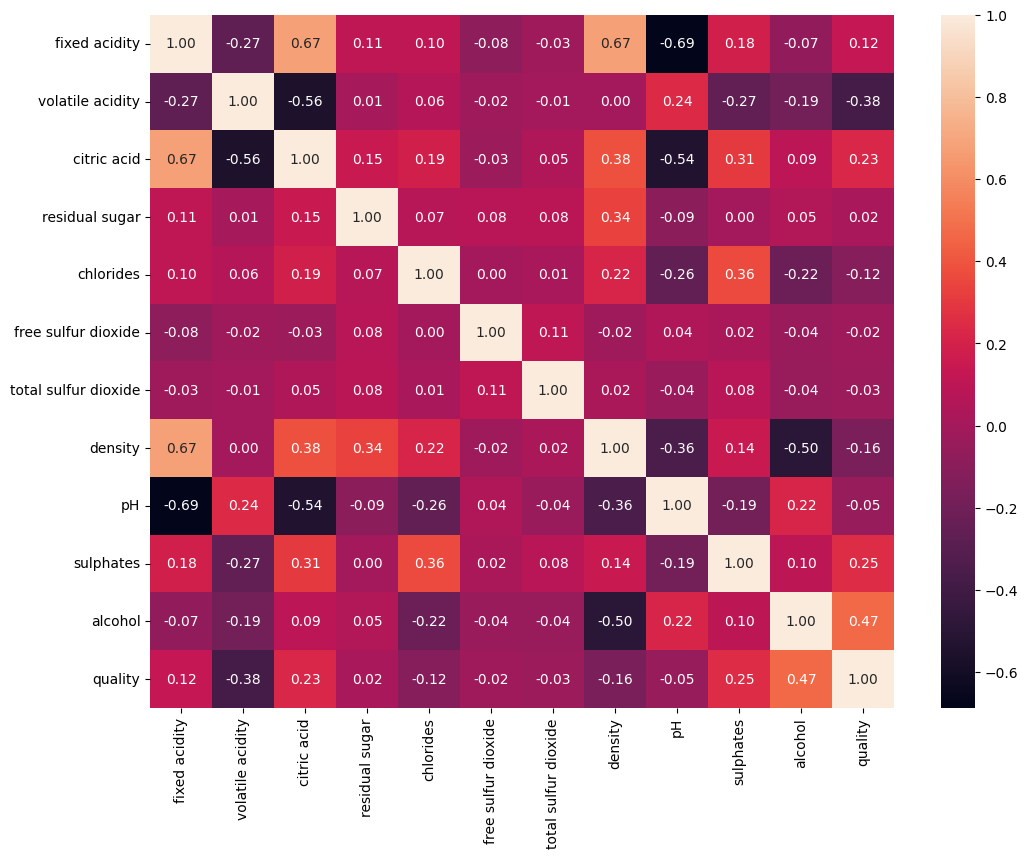

White wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.023098,0.282806,0.087070,0.033997,-0.049386,0.082508,0.258367,-0.433123,-0.022759,-0.087048,-0.109507
volatile acidity,-0.023098,1.000000,-0.148231,0.068928,-0.000071,-0.099583,0.086699,0.029930,-0.033409,-0.034673,0.046911,-0.185678
citric acid,0.282806,-0.148231,1.000000,0.094374,0.030569,0.098850,0.120343,0.148118,-0.165197,0.059774,-0.064227,-0.005649
residual sugar,0.087070,0.068928,0.094374,1.000000,0.001746,0.294601,0.394432,0.839247,-0.199349,-0.032326,-0.335462,-0.093812
chlorides,0.033997,-0.000071,0.030569,0.001746,1.000000,0.017715,0.030894,0.038071,-0.024511,0.002809,-0.042404,-0.017645
free sulfur dioxide,-0.049386,-0.099583,0.098850,0.294601,0.017715,1.000000,0.622803,0.292811,-0.001553,0.058635,-0.189573,0.009552
total sulfur dioxide,0.082508,0.086699,0.120343,0.394432,0.030894,0.622803,1.000000,0.522703,-0.002120,0.130892,-0.346586,-0.166933
density,0.258367,0.029930,0.148118,0.839247,0.038071,0.292811,0.522703,1.000000,-0.098759,0.069017,-0.598413,-0.300539
pH,-0.433123,-0.033409,-0.165197,-0.199349,-0.024511,-0.001553,-0.002120,-0.098759,1.000000,0.160625,0.086718,0.101252
sulphates,-0.022759,-0.034673,0.059774,-0.032326,0.002809,0.058635,0.130892,0.069017,0.160625,1.000000,-0.022149,0.058924


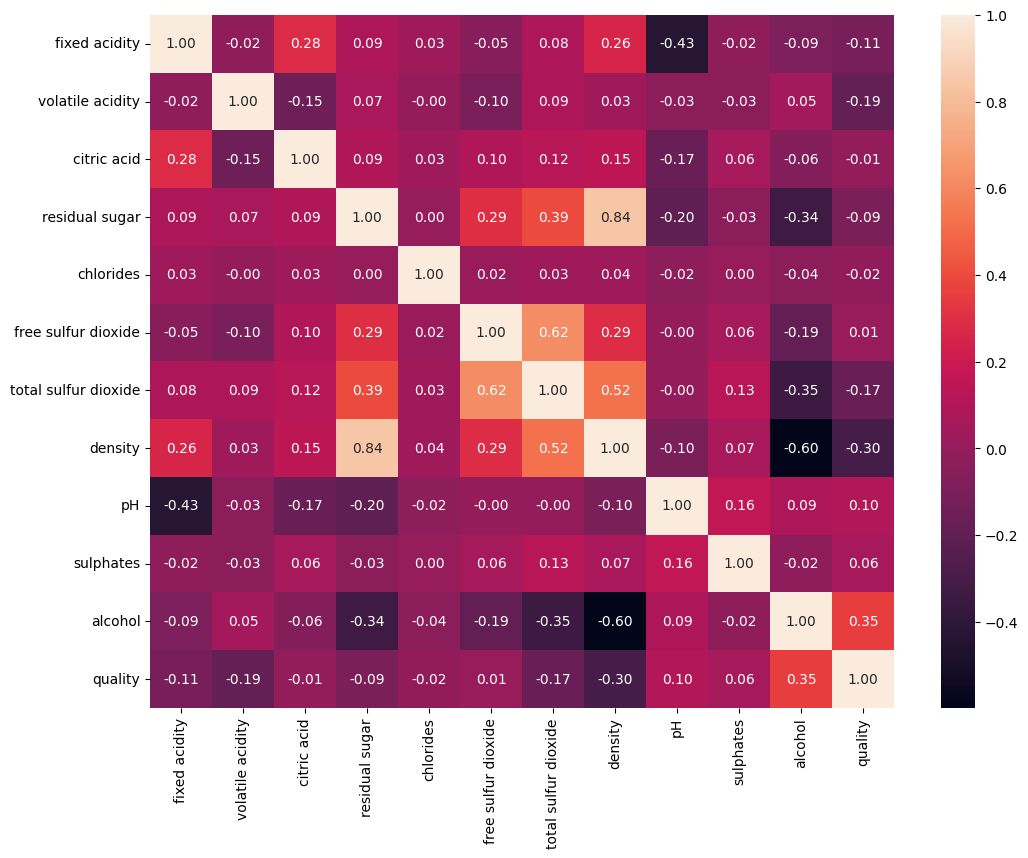

In [12]:
# Correlation matrix
print("Red wine")
display(df_red.corr())
plt.figure(figsize=(12, 9))
sns.heatmap(df_red.corr(), annot=True, fmt=".2f")
plt.show()

print("White wine")
display(df_white.corr())
plt.figure(figsize=(12, 9))
sns.heatmap(df_white.corr(), annot=True, fmt=".2f")
plt.show()

## Interpret the heatmap

### Red wine

1. **Fixed Acidity:**
    - Has a strong positive correlation with citric acid (0.67), which is expected as both are acids.
    - Has a strong negative correlation with pH (-0.69), indicating that as fixed acidity increases, pH tends to decrease (become more acidic).

2. **Volatile Acidity:**
    - Shows a strong negative correlation with citric acid (-0.56), which suggests that as volatile acidity increases, citric acid tends to decrease.
    - Has a moderately negative correlation with quality (-0.38), implying that higher volatile acidity may be associated with lower wine quality.

3. **Citric Acid:**
    - Has a moderate positive correlation with sulphates (0.31), indicating a relationship where wines with more citric acid also tend to have more sulphates.

4. **Residual Sugar, Chlorides, Free Sulfur Dioxide, Total Sulfur Dioxide:**
    - These variables do not show strong correlations with other variables in the heatmap (most coefficients are close to 0), suggesting that they do not have strong linear relationships with other measured components in red wine.

5. **Density:**
    - Has a moderate positive correlation with fixed acidity (0.67) and a moderate negative correlation with alcohol (-0.50), which makes sense as alcohol tends to be less dense than water.

6. **pH:**
    - Shows a strong negative correlation with fixed acidity (-0.69) and a moderate negative correlation with citric acid (-0.54), which aligns with the chemical understanding that more acid lowers the pH value.

7. **Sulphates:**
    - Has a moderate positive correlation with citric acid (0.31) and a mild positive correlation with quality (0.25), suggesting that sulphates might contribute positively to the perceived quality of red wine.

8. **Alcohol:**
    - Exhibits the strongest positive correlation with quality (0.47) within this heatmap, suggesting that higher alcohol content may be associated with higher quality ratings in red wine.

9. **Quality:**
    - Aside from alcohol, it has a moderate negative correlation with volatile acidity (-0.38) and a mild positive correlation with sulphates (0.25). This suggests that wines with less volatile acidity and more sulphates tend to be rated as higher quality.

### White wine

1. **Fixed Acidity:**
    - Has a moderate negative correlation with pH (-0.43), suggesting that as fixed acidity increases, pH tends to decrease.
    - There are no strong positive correlations with any other variables.

2. **Volatile Acidity:**
    - Does not show strong correlations with any of the variables. The highest correlation is a very weak negative correlation with quality (-0.19), indicating a slight tendency for lower quality with higher volatile acidity.

3. **Citric Acid:**
    - Also shows no strong correlations with other variables in the dataset.

4. **Residual Sugar:**
    - Has a strong positive correlation with density (0.84), which is logical since sugar increases the density of the liquid.
    - There's a moderate positive correlation with total sulfur dioxide (0.39). This might be due to the fact that wines with higher sugar content could need more sulfur dioxide as a preservative.

5. **Chlorides:**
    - No strong correlations are observed with chlorides and other variables.

6. **Free Sulfur Dioxide and Total Sulfur Dioxide:**
    - Show a strong positive correlation with each other (0.62). This is expected as free sulfur dioxide is a part of the total sulfur dioxide measurement.
    - Both have a moderate positive correlation with residual sugar (0.29 for free and 0.39 for total), possibly indicating that sweeter wines might contain higher levels of sulfur dioxide, possibly due to the preservative qualities needed for sweeter wines.

7. **Density:**
    - Shows a strong positive correlation with residual sugar (0.84) as mentioned, and a moderate positive correlation with alcohol (0.52). This latter correlation could be due to higher sugar content wines undergoing more fermentation, leading to higher alcohol content.

8. **pH:**
    - Shows a moderate negative correlation with fixed acidity (-0.43), which is a typical chemical relationship (acidic substances lower the pH).

9. **Sulphates:**
    - There is a weak correlation between sulphates and other variables in the dataset.

10. **Alcohol:**
    - Has a moderate negative correlation with density (-0.60), which makes sense because alcohol is less dense than water.
    - There is a moderate positive correlation with quality (0.35), suggesting that wines with higher alcohol content might be associated with higher quality.

11. **Quality:**
    - The strongest correlation with quality is with alcohol (0.35), indicating that as alcohol content increases, quality rating might also increase.
    - Quality shows weak negative correlations with volatile acidity (-0.19) and density (-0.30), suggesting that higher quality wines might have lower volatile acidity and density.

## Outliers

**IQR (Interquartile Range)**: The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) in a dataset. An outlier is often considered to be any data point that lies more than 1.5 times the IQR above the third quartile or below the first 

In [13]:
Q1 = df_red.quantile(0.25)
Q3 = df_red.quantile(0.75)
IQR = Q3 - Q1
outliers = df_red[(df_red < (Q1 - 1.5 * IQR)) | (df_red > (Q3 + 1.5 * IQR))]
display(outliers)
display(outliers.notna().sum())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,1.01,NaN,NaN,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,4.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1434,NaN,NaN,NaN,NaN,0.159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


fixed acidity            42
volatile acidity         18
citric acid               1
residual sugar          138
chlorides                96
free sulfur dioxide      28
total sulfur dioxide     51
density                  37
pH                       30
sulphates                50
alcohol                  12
quality                  25
dtype: int64

In [14]:
Q1 = df_white.quantile(0.25)
Q3 = df_white.quantile(0.75)
IQR = Q3 - Q1
outliers = df_white[(df_white < (Q1 - 1.5 * IQR)) | (df_white > (Q3 + 1.5 * IQR))]
display(outliers)
display(outliers.notna().sum())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,0.119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.59,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


fixed acidity           110
volatile acidity        167
citric acid             242
residual sugar            6
chlorides               186
free sulfur dioxide      51
total sulfur dioxide     17
density                   4
pH                       63
sulphates               119
alcohol                   1
quality                 180
dtype: int64